In [1]:
%reset -f

In [2]:
import tensorflow as tf
import time

print(tf.__version__)

1.12.0


In [3]:
import os
import numpy as np
npzfile=np.load('rawtrainfile.npz')
npzfile.files

images=npzfile['arr_0']
labels=npzfile['arr_1']




In [4]:
npimages=np.array(images)
nplabels=np.array(labels)
print('images shape: {} \n labels shape: {}'.format(npimages.shape, nplabels.shape))
print('first image shape: {} \n first eleven label shape: {}'.format(npimages[0].shape, nplabels[0:10]))


images shape: (39209,) 
 labels shape: (39209,)
first image shape: (30, 29, 3) 
 first eleven label shape: [0 0 0 0 0 0 0 0 0 0]


In [5]:
from skimage.transform import resize

images48 = [resize(image, (48, 48)) for image in npimages]
print(type(images48))


C:\Users\asmna\Documents\Python\envs\tfgpu\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\asmna\Documents\Python\envs\tfgpu\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


<class 'list'>


In [6]:
images48 = np.array(images48)
print('total number of images and size {}'.format(images48.shape))
print(images48[0].shape)

total number of images and size (39209, 48, 48, 3)
(48, 48, 3)


In [7]:
import keras
from keras.layers import Input, Embedding, GRU, LSTM, MaxPooling2D, CuDNNGRU, CuDNNLSTM, Reshape
from keras.layers import Dropout, Dense, Activation, Flatten,Conv2D,  BatchNormalization
from keras.models import Sequential
from keras.layers import LSTM  


model = Sequential()
model.add(Conv2D(1, kernel_size=(1, 1),padding='valid', strides=1, activation='relu', input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Conv2D(29, 5, padding='valid', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(3,  padding='valid',strides=2))
model.add(Dropout(0.1))
                 
model.add(Conv2D(59, 3,  padding='valid',strides=1, activation='relu')) # increase kernel size to 5
model.add(BatchNormalization())
model.add(MaxPooling2D(3,strides=2,  padding='valid'))
model.add(Dropout(0.1))

model.add(Conv2D(74, 3, strides=1, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(3,strides=2,  padding='valid')) 
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(300))
model.add(Dropout(0.5))
model.add(Dense(225))
model.add(Dropout(0.5))
#model.add(Reshape((15, 15)))
#model.add(LSTM(86, dropout=0.1, recurrent_dropout=0.5)) # defaults inclide tanh activation
#model.add(CuDNNLSTM(86))
model.add(Dense(43, activation='softmax'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 1)         4         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 1)         4         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 29)        754       
_________________________________________________________________
batch_normalization_2 (Batch (None, 44, 44, 29)        116       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 29)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 21, 29)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 59)        15458     
__________

In [8]:
## Training plot

import matplotlib.pyplot as plt

traffic_signs = [250, 2120, 3400, 6500,9000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    #plt.imshow(images27[traffic_signs[i]], cmap="gray")
    plt.imshow(images48[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

<Figure size 640x480 with 5 Axes>

In [9]:

X_train=images48.astype('float32')

print(X_train.shape)

#nplabels=np.array(labels)
print("First label is %s and Total labels shape are %s" %(nplabels[0], nplabels.shape))


Y = keras.utils.to_categorical(nplabels,43)

print("after one hot coding Labels shape is:",Y.shape)
print("First Label after one hot coding:",Y[0])

(39209, 48, 48, 3)
First label is 0 and Total labels shape are (39209,)
after one hot coding Labels shape is: (39209, 43)
First Label after one hot coding: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
import pandas as pd
import os
import numpy as np
npzfilet=np.load('rawtestfile.npz')
npzfilet.files

X_test=npzfilet['arr_0']
y_test=npzfilet['arr_1']



test_images = np.array(X_test)
test_labels = np.array(y_test)


In [11]:
test_images.shape

(12630,)

In [12]:
from skimage import transform
from skimage.color import rgb2gray

test_imagesnp=np.array(test_images)
    

# Transform the images to 28 by 28 pixels
test_images48 = [transform.resize(image, (48, 48)) for image in test_imagesnp]



C:\Users\asmna\Documents\Python\envs\tfgpu\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\asmna\Documents\Python\envs\tfgpu\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


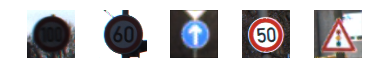

In [13]:
import matplotlib.pyplot as plt

testsigns = [150, 700, 1100, 1500,5000]

for i in range(len(testsigns)):
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    #plt.imshow(images27[traffic_signs[i]], cmap="gray")
    plt.imshow(test_images48[testsigns[i]])
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [14]:
tnpimages=np.array(test_images48)
tnplabels=np.array(test_labels)
print('images shape: {} \n labels shape: {}'.format(tnpimages.shape, tnplabels.shape))
print('first image shape: {} \n first eleven label shape: {}'.format(tnpimages[0].shape, tnplabels[0:10]))


images shape: (12630, 48, 48, 3) 
 labels shape: (12630,)
first image shape: (48, 48, 3) 
 first eleven label shape: [16  1 38 33 11 38 18 12 25 35]


In [15]:
#X_test=test_images27
X_test=tnpimages.astype('float32')

Y_test = keras.utils.to_categorical(tnplabels,43)


In [16]:

start_time = time.time()
print('Start time in seconds is : {}'.format(start_time))

Start time in seconds is : 1552521229.8067539


In [17]:


model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']) 

epoch=150
history=model.fit(X_train, Y, validation_data=(X_test, Y_test),epochs=epoch, batch_size=128, shuffle=True, verbose=1)


Train on 39209 samples, validate on 12630 samples
Epoch 1/150
39209/39209 [==============================] - 17s 439us/step - loss: 3.4836 - acc: 0.2682 - val_loss: 2.1428 - val_acc: 0.3144
Epoch 2/150
39209/39209 [==============================] - 13s 338us/step - loss: 1.9972 - acc: 0.3854 - val_loss: 1.6420 - val_acc: 0.4838
Epoch 3/150
39209/39209 [==============================] - 13s 339us/step - loss: 1.3790 - acc: 0.5768 - val_loss: 1.4547 - val_acc: 0.5882
Epoch 4/150
39209/39209 [==============================] - 13s 338us/step - loss: 0.7016 - acc: 0.7828 - val_loss: 0.5643 - val_acc: 0.8354
Epoch 5/150
39209/39209 [==============================] - 13s 336us/step - loss: 0.3753 - acc: 0.8860 - val_loss: 0.5413 - val_acc: 0.8521
Epoch 6/150
39209/39209 [==============================] - 13s 337us/step - loss: 0.2191 - acc: 0.9326 - val_loss: 0.3411 - val_acc: 0.9108
Epoch 7/150
39209/39209 [==============================] - 13s 342us/step - loss: 0.1576 - acc: 0.9546 - val_l

Epoch 59/150
39209/39209 [==============================] - 13s 338us/step - loss: 0.0132 - acc: 0.9969 - val_loss: 0.1492 - val_acc: 0.9762
Epoch 60/150
39209/39209 [==============================] - 13s 341us/step - loss: 0.0121 - acc: 0.9974 - val_loss: 0.1672 - val_acc: 0.9728
Epoch 61/150
39209/39209 [==============================] - 13s 338us/step - loss: 0.0117 - acc: 0.9974 - val_loss: 0.1533 - val_acc: 0.9765
Epoch 62/150
39209/39209 [==============================] - 13s 336us/step - loss: 0.0136 - acc: 0.9971 - val_loss: 0.1853 - val_acc: 0.9747
Epoch 63/150
39209/39209 [==============================] - 13s 337us/step - loss: 0.0095 - acc: 0.9978 - val_loss: 0.1658 - val_acc: 0.9762
Epoch 64/150
39209/39209 [==============================] - 13s 337us/step - loss: 0.0125 - acc: 0.9973 - val_loss: 0.1915 - val_acc: 0.9750
Epoch 65/150
39209/39209 [==============================] - 13s 337us/step - loss: 0.0140 - acc: 0.9971 - val_loss: 0.1994 - val_acc: 0.9754
Epoch 66/150


Epoch 117/150
39209/39209 [==============================] - 13s 340us/step - loss: 0.0085 - acc: 0.9985 - val_loss: 0.1979 - val_acc: 0.9781
Epoch 118/150
39209/39209 [==============================] - 13s 335us/step - loss: 0.0076 - acc: 0.9985 - val_loss: 0.2357 - val_acc: 0.9757
Epoch 119/150
39209/39209 [==============================] - 13s 336us/step - loss: 0.0087 - acc: 0.9985 - val_loss: 0.2115 - val_acc: 0.9784
Epoch 120/150
39209/39209 [==============================] - 13s 336us/step - loss: 0.0047 - acc: 0.9990 - val_loss: 0.1665 - val_acc: 0.9792
Epoch 121/150
39209/39209 [==============================] - 13s 336us/step - loss: 0.0086 - acc: 0.9981 - val_loss: 0.1916 - val_acc: 0.9756
Epoch 122/150
39209/39209 [==============================] - 13s 334us/step - loss: 0.0089 - acc: 0.9984 - val_loss: 0.1836 - val_acc: 0.9787
Epoch 123/150
39209/39209 [==============================] - 13s 334us/step - loss: 0.0086 - acc: 0.9984 - val_loss: 0.2018 - val_acc: 0.9766
Epoch 

In [18]:
print("Total time to run %s seconds" % (time.time() - start_time))


Total time to run 1994.857094526291 seconds


In [19]:

print('final learning rate',keras.backend.eval(model.optimizer.lr))

v=history.history['val_acc']
test_accuracy=v[-10 :]
print('test accuracy average for 10 epochs is :', sum(test_accuracy) / len(test_accuracy))


final learning rate 1.0
test accuracy average for 10 epochs is : 0.9782422802057515


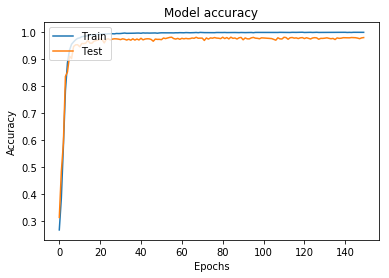

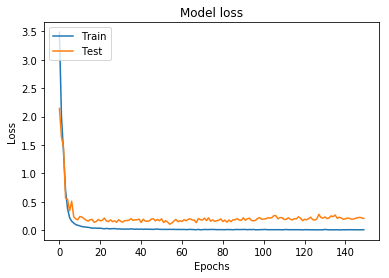

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
# y_prob = model.predict(tnpimages)
# y_prob[1]

In [22]:
ypred=model.predict_classes(tnpimages)
tnplabels[10]

12

In [23]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(tnplabels, ypred)
print(cm)

[[ 60   0   0 ...   0   0   0]
 [  0 716   2 ...   0   0   0]
 [  0   1 749 ...   0   0   0]
 ...
 [  0   0   0 ...  81   0   0]
 [  0   0   0 ...   0  60   0]
 [  0   0   0 ...   0   0  89]]


In [24]:
from sklearn.metrics import classification_report
print(classification_report(tnplabels, ypred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      0.99      0.99       720
           2       0.98      1.00      0.99       750
           3       1.00      0.98      0.99       450
           4       0.99      0.99      0.99       660
           5       0.97      0.98      0.97       630
           6       0.97      0.86      0.91       150
           7       1.00      0.99      0.99       450
           8       0.98      0.99      0.99       450
           9       1.00      1.00      1.00       480
          10       0.99      1.00      0.99       660
          11       0.98      1.00      0.99       420
          12       0.94      0.99      0.97       690
          13       1.00      0.99      1.00       720
          14       1.00      1.00      1.00       270
          15       0.92      1.00      0.96       210
          16       1.00      1.00      1.00       150
          17       1.00    

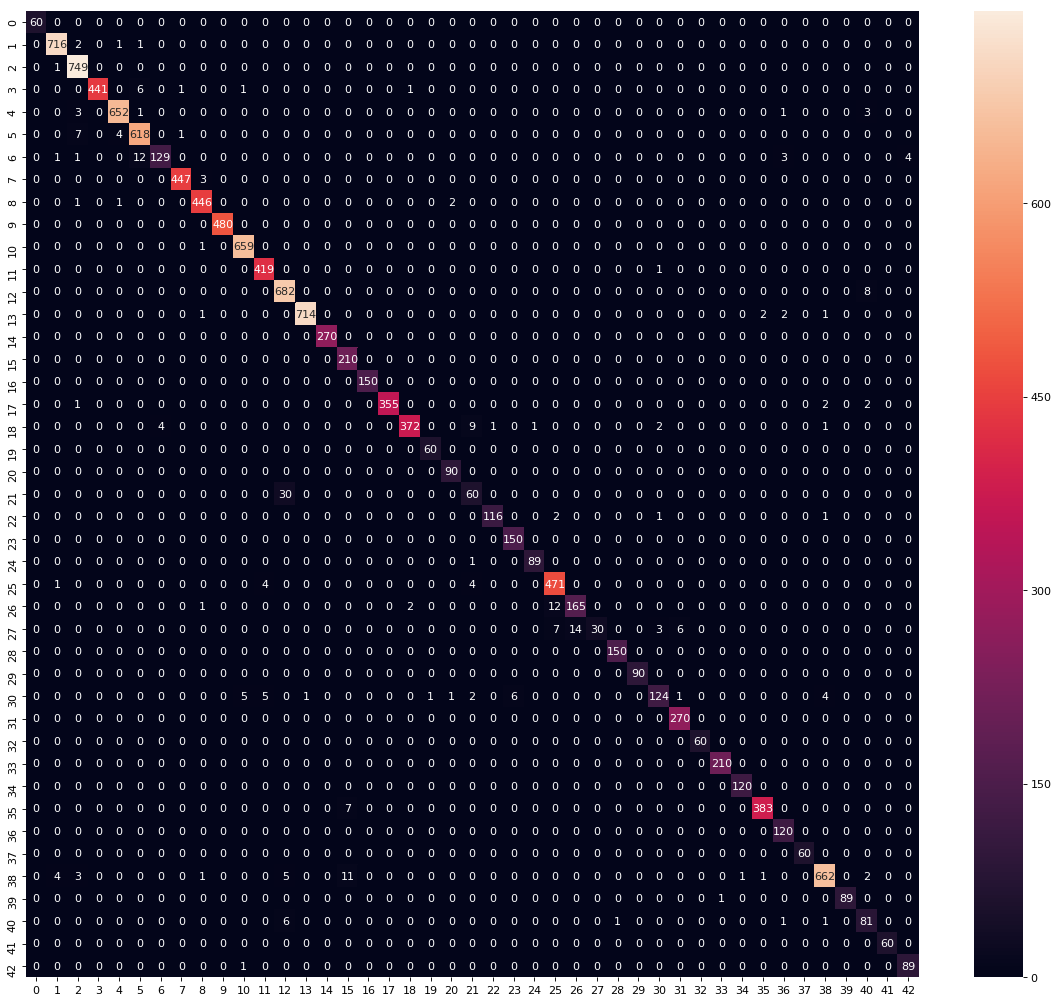

In [25]:
import seaborn as sns
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')


sns.heatmap(confusion_matrix(tnplabels, ypred),annot=True,fmt="d") 


In [26]:
data1=tnpimages


97.92557402253624
81.03721299817047
70.45130640763851
63.79255742282973
58.00475059099265
53.087885997074515
49.770387962802666
46.904196364485074
43.94299288307592
41.195566115262295
39.23990499473052
36.97545527326429
35.415676958676094
33.73713380131378
32.779097383869896
31.20348377069215
30.007917660857043
29.231987328446294
27.6959620032722
26.342042756052315


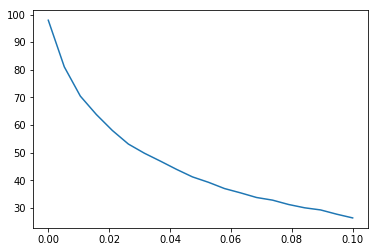

In [27]:
## gaussian noise evaluation

from skimage.util import random_noise
from skimage import transform
import matplotlib.pyplot as plt

import numpy as np
vara=np.linspace(0, 0.1, 20)
i=0
b=np.zeros((len(vara),1))
for a in vara:

  gaussian_noise_imgs = [random_noise(image, mode='gaussian',mean=0,var=a,seed=None, clip=True) for image in data1]
  gaussian_noise_imgs=np.array(gaussian_noise_imgs)
  
  gaussian_noise_imgs=gaussian_noise_imgs.astype('float32')
  score = model.evaluate(gaussian_noise_imgs, Y_test, batch_size=128, verbose=0)
  b[i]=score[1]*100
  i+=1

  print(score[1]*100)
  
 
fig, ax = plt.subplots()
ax.plot(vara, b)

  
 

In [28]:

data2=tnpimages

In [29]:

sd1=[10, 10,10]
sd2=[20, 20,20]
sd3=[30, 30,30]
sd4=[40, 40,40]
sd5=[50, 50,50]
sd6=[6.3, 6.3, 6.3]
sd7=[12.75, 12.75, 12.75]
sd8=[19.21, 19.21, 19.21]
sdrange=[sd1,sd2,sd3,sd4,sd5,sd6,sd7,sd8]


nprn=np.zeros(3)

for sd in sdrange:
  i=0
  for values in sd:
      nsd=values/255
      varsd=nsd*nsd
      gaussian_noise_imgs = [random_noise(image, mode='gaussian',mean=0,var=varsd,seed=None, clip=True) for image in data2]
      gaussian_noise_imgs=np.array(gaussian_noise_imgs)
      
      gaussian_noise_imgs=gaussian_noise_imgs.astype('float32')
      score = model.evaluate(gaussian_noise_imgs, Y_test, batch_size=128, verbose=0)
      print('Accuracy is:', score[1], 'for sd', values)  
      nprn[i]=score[1]
      i+=1

      

  avgsd=nprn
  print(' accuracy average is :', sum(avgsd) / len(avgsd))


Accuracy is: 0.9245447348623359 for sd 10
Accuracy is: 0.9241488520436502 for sd 10
Accuracy is: 0.9258115598443757 for sd 10
 accuracy average is : 0.9248350489167873
Accuracy is: 0.7920031672324439 for sd 20
Accuracy is: 0.794220110648979 for sd 20
Accuracy is: 0.7889152810956784 for sd 20
 accuracy average is : 0.791712852992367
Accuracy is: 0.6602533651644147 for sd 30
Accuracy is: 0.6585906572504262 for sd 30
Accuracy is: 0.6600950120746948 for sd 30
 accuracy average is : 0.6596463448298452
Accuracy is: 0.5515439430683827 for sd 40
Accuracy is: 0.5517814728351028 for sd 40
Accuracy is: 0.551939825669981 for sd 40
 accuracy average is : 0.5517550805244889
Accuracy is: 0.46049089478483674 for sd 50
Accuracy is: 0.4553444180522565 for sd 50
Accuracy is: 0.4577197148652654 for sd 50
 accuracy average is : 0.45785167590078624
Accuracy is: 0.9617577196017014 for sd 6.3
Accuracy is: 0.9625494852013184 for sd 6.3
Accuracy is: 0.9622327789841242 for sd 6.3
 accuracy average is : 0.9621799

psnr of original image and true image : 14.194159082534147
float64
float64


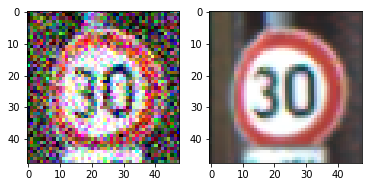

In [30]:
  #psnr calculatioon
  
  import skimage
  import numpy as np
  from skimage import img_as_float
  b=1
  
  a = random_noise(tnpimages[b], mode='gaussian',mean=0,var=0.05,seed=None, clip=True) 
  plt.subplot(1, 2,1)
  plt.imshow(a)
  plt.subplot(1, 2,2)
  c=tnpimages[b]
  plt.imshow(c)
  imtrue=img_as_float	(c)
  imtest=a
  print('psnr of original image and true image :',skimage.measure.compare_psnr(imtrue, imtest, data_range=None))
  
  print(imtrue.dtype)
  print(imtest.dtype)

In [31]:

model.save('keras4_Cnn_adadelta_pooldrop.h5')